Question 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
def read_data():
    return pd.read_csv('data.csv')

In [73]:
def split(data):
    df = data
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    np.random.seed(24)
    indices = np.random.permutation(len(df))
    train_size = int(0.8 * len(df))
    train_slice, test_slice = indices[:train_size], indices[train_size:]
    X_train, X_test = X[train_slice], X[test_slice]
    Y_train, Y_test = y[train_slice], y[test_slice]
    return X_train, Y_train, X_test, Y_test


In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [5]:
def accuracy(y_true, y_pred):
    return np.sum(y_pred == y_true) / len(y_true)

In [6]:
def precision(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    return true_positive / (true_positive + false_positive)

In [7]:
def recall(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    return true_positive / (true_positive + false_negative)

In [8]:
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

In [74]:
def knn_predict(X_train, y_train, X_test, k=11):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [y_train[i] for i in nearest_indices]
        predicted_label = np.bincount(nearest_labels).argmax()
        predictions.append(predicted_label)
    return np.array(predictions)


In [75]:
def kmeans(X, k):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    max_iters = 100
    for i in range(max_iters):
        distances = np.array([np.linalg.norm(X - c, axis=1) for c in centroids])
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [76]:
data = read_data()

In [77]:
print("First 5 columns of the data:")
print(data.iloc[:, :5].head())

First 5 columns of the data:
              0         1         2             3         4
0 -3.014000e-06 -0.000044 -0.000278 -6.710100e-06 -0.000015
1 -4.532700e-06 -0.000027  0.000115  2.347100e-07 -0.000022
2 -9.615600e-07  0.000002 -0.000006  4.854600e-06  0.000006
3  1.856800e-06 -0.000013 -0.000139 -2.323100e-06 -0.000059
4 -1.833400e-06  0.000007  0.000011 -4.316300e-06  0.000001


In [82]:
X_train, Y_train, X_test, Y_test = split(data)

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [84]:
knn_predictions = knn_predict(X_train, Y_train, X_test, k=11)


In [88]:
knn_accuracy = accuracy(Y_test, knn_predictions)
knn_precision = precision(Y_test, knn_predictions)
knn_recall = recall(Y_test, knn_predictions)

TypeError: 'numpy.float64' object is not callable

In [89]:
k = 5  
kmeans_labels, kmeans_centers = kmeans(X_train, k)


In [87]:

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)

print("Number of K-Means Clusters:", k)
print("K-Means Cluster Centers:\n", kmeans_centers)

KNN Accuracy: 0.7818603515625
KNN Precision: 1.0
KNN Recall: 1.0
Number of K-Means Clusters: 5
K-Means Cluster Centers:
 [[-2.55731827e-01 -3.43463012e-01 -2.73401549e-02  6.70625662e-02
  -3.99584142e-01 -1.09646358e-01 -2.44940665e+00 -2.44905662e+00
  -2.44846578e+00 -2.49758088e+00 -2.49742639e+00 -2.49717337e+00
  -1.51361447e-02 -1.84163358e-02 -4.32710755e-02  2.54990608e-03
   8.28986050e-03  4.91626760e-05  8.72482022e-02  8.72600362e-02
   8.73147815e-02  9.03790946e-02  9.03764428e-02  9.04457578e-02
   1.27805459e-01 -1.62461874e-01 -1.51096717e-02  4.22431996e-02
  -9.59790210e-02  2.13005354e-02 -3.38811158e-01 -3.37051402e-01
  -3.40333723e-01 -1.20700009e+00 -1.20661509e+00 -1.20559250e+00
  -5.48266117e-03  2.53026717e-02 -8.42151068e-03 -4.89800304e-04
   4.46697797e-02  4.50741701e-02  3.77503148e-01  3.77280258e-01
   3.80176031e-01  3.96616322e-02  3.89340763e-02  3.25221160e-02]
 [ 1.00790948e-02  2.35192342e-02 -7.47417460e-03  4.64326432e-03
   2.77289149e-02  2

Question 2

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [91]:
data = pd.read_csv("data.csv")

In [92]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [94]:
scaler = StandardScaler()

In [95]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM

In [96]:
svc = SVC(kernel = 'linear', C = 1.0)

In [97]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [98]:
y_pred = svc.predict(X_test)

In [99]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.929485301298955


In [100]:
recall_svm = recall_score(Y_test, y_pred, average = 'macro')

In [101]:
precision_svm = precision_score(Y_test, y_pred, average = 'macro')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


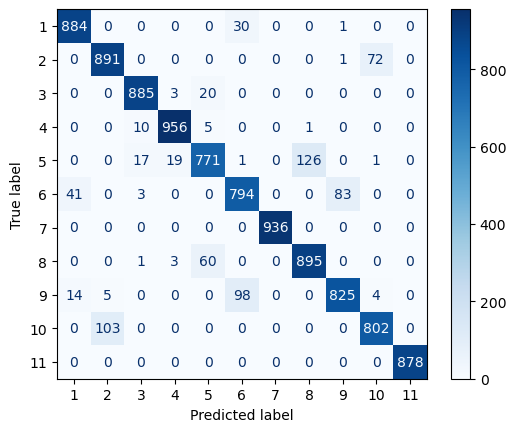

In [102]:
plot_confusion_matrix(svc, X_test, Y_test, cmap = plt.cm.Blues)
plt.show()

Logistic Regression

In [103]:
logistic_Regression = LogisticRegression(max_iter=1000)

In [104]:
logistic_Regression.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [105]:
y_pred = logistic_Regression.predict(X_test)

In [106]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.9207930461959176


In [108]:
recall = recall_score(Y_test, y_pred, average = 'macro')
print(recall)

0.9212547584733035


In [109]:
precision = precision_score(Y_test, y_pred, average = 'macro')
print(precision)

0.9211130645997816


In [110]:
plot_confusion_matrix(logistic_Regression, X_test, Y_test, cmap = plt.cm.Blues)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Kmeans

In [111]:
np.random.seed(0)
X = np.random.rand(100, 2)

In [112]:
kmeans = KMeans(n_clusters=11, random_state=50)

In [113]:
kmeans.fit_predict(X)

array([ 3,  3,  3,  8,  9,  9,  1,  7,  4,  1,  5,  8, 10,  4,  6,  4,  3,
       10,  3,  5,  2,  0,  3,  7,  2,  6,  0,  7,  6,  6,  7,  0,  2,  0,
        0,  9,  5,  0,  7,  7,  2, 10,  6,  0,  1, 10, 10,  7,  0,  0,  6,
        1, 10,  3,  4,  8,  6,  9,  5,  5,  9,  5,  3,  2,  6,  6,  2,  3,
        3,  6,  9,  8,  5,  4,  1,  4, 10,  4,  9,  7,  9,  1,  5,  2,  0,
        0,  7,  0,  8,  0, 10,  6,  5,  3,  6,  7,  4,  9,  2,  2])

In [114]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [120]:
plt.figure(figsize=(4, 2))
for cluster_label in range(11):
    plt.scatter(X[labels == cluster_label][:, 0], X[labels == cluster_label][:, 1], label=f'Cluster {cluster_label + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='X', label='Centroids')
    plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

KNN


In [121]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [122]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [123]:
y_pred = knn.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [124]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7934368590682684


In [125]:
precision = precision_score(Y_test, y_pred, average = 'macro')
print(precision)

0.7986565153996729


In [126]:
recall = recall_score(Y_test, y_pred, average = 'macro')
print(recall)

0.7942349988750941


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


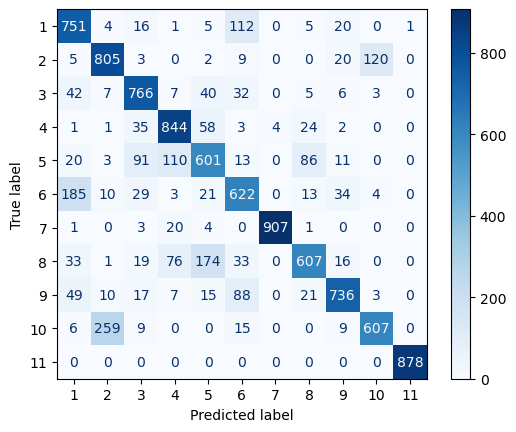

In [127]:
plot_confusion_matrix(knn, X_test, Y_test, cmap = plt.cm.Blues)
plt.show()

In [128]:
from sklearn.ensemble import VotingClassifier

In [129]:
ensemble_classifier = VotingClassifier(
    estimators=[
        ('SVC', svc),
        ('Logistic Regression', logistic_Regression),
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

In [130]:
ensemble_classifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('SVC', SVC(kernel='linear')),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000))])

In [131]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.7934368590682684


In [132]:
precision = precision_score(Y_test, y_pred, average='macro')
print(precision)

0.7986565153996729


In [133]:
recall = recall_score(Y_test, y_pred, average='macro')
print(recall)

0.7942349988750941


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x800 with 0 Axes>

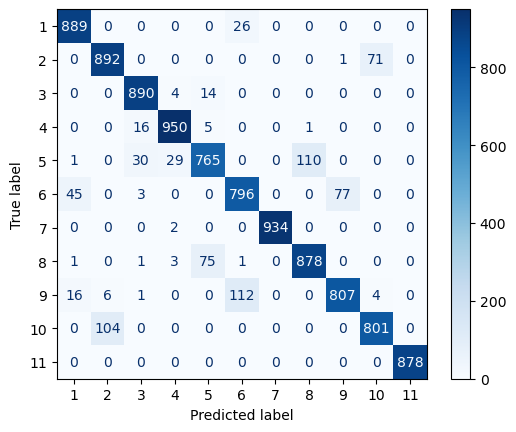

In [135]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(20, 8))
plot_confusion_matrix(ensemble_classifier, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()